<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PNNPPV/notebooky/cv03-en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3rd Lab - Training I.

This notebook will deal with basics of neural network traning in keras. We will go throught the basic division of the training data into the training, validation and testing subset. We will try out various activation and loss functions. We will also try to use various regularization methods.

We will be using the keras framework from now on you can check its documentation at [keras.io](https://keras.io/).

## Fully connected neural networks

Keras was originally designed as a user-friendly API for tensorflow and theano frameworks.  Today keras is usually shipped as a part of the general tensorflow distribution. We will import keras as a standalone package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

Let us load some data.

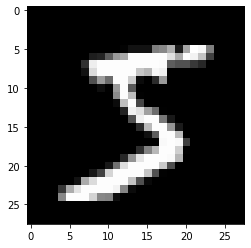

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [2]:
(x, y), (x_test, y_test) = mnist.load_data()
x = np.reshape(x,(-1,784)).astype(np.float32) / 255
x_test = np.reshape(x_test,(-1,784)).astype(np.float32) / 255
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

plt.imshow(np.reshape(x[0,:],(28,28)), cmap='gray')
plt.show()
print(y[0])

### Model construction

Keras has the Sequential class which represents a simple sequntial model of a neural netowrk where outputs of each layer are fed to exactly one following layer. It is therefore easy to represent such a network as a list of layers. Let us create a network which is identical to the one from the previous notebook.

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In odrder to train the model we will need to assign a loss function to it and choose the optimizer. This step is called compilation. We can look at the model structure before and after compilation with the method summary.

*Note.:* We can only call summary when the model is complte, so the layer sizes can be known. If the first layer has no input shape defined then the summary can only be called after we feed the network some data.

In [5]:
loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
None


We train the model by calling the fit method which requires the training data. Right now we will run the training just for a few seconds. We also forego the splitting of the data for now.

In [6]:
model.fit(x, y, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2434 - accuracy: 0.2702
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9677 - accuracy: 0.5149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5391 - accuracy: 0.6395
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1780 - accuracy: 0.7128
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9377 - accuracy: 0.7640


## Preliminary model verification

While training the model we shoudld check whether the model actually has enough capapcity for the given problem. We can think of capacity for now as a measure of how many various functions can the model represent and/or how complex this function space is. If our model is unable to model the desired function (such as a classifier) even from the theoretical perspective. It is clear that this model is then unsuitable for a given task. For instance using a linear classifier for linearly inseparable data is a good example of a lacking model capacity.

The easiest way to test this is to select a very small subset of training data and iterate the optimization on this small sample of data. Our aim is to see if our model is able to achieve 100% accuracy on this small subsample.

This step is also useful for verification of the training process including all of the data manipulation etc.

*Note.:* It is important that the sample is varied at least in the expected output, because otherwise the required capacity of the model is irrelevant.

Let us test the model on some small data sample.

In [7]:
x_mini = x[:32]
y_mini = y[:32]

x_mini = np.repeat(x_mini, 1000, axis=0)
y_mini = np.repeat(y_mini, 1000, axis=0)

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, batch_size=32, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1788 - accuracy: 0.1988
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.9966 - accuracy: 0.3646
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6890 - accuracy: 0.4995
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2931 - accuracy: 0.6688
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9330 - accuracy: 0.8022
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6609 - accuracy: 0.8971
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.9833
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3408 - accuracy: 1.0000
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2521 - accuracy: 1.0000
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.190

As we can see our model is able to reach 100% accuracy on the samll sample. This means that the model has at least some capacity to estimate the classifier function. We will now explore some models where the capacity is clearly insufficient. For example, leaving out the nonlienearity decreases any fully connected neural network to a linear classifier with the number of weights equal to the size of the smallest layer.

In [8]:
model = Sequential()
model.add(Dense(30))
model.add(Dense(20))
model.add(Dense(10))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 8.9387 - accuracy: 0.2181
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0664 - accuracy: 0.2188
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 9.066

Also a model that is too small will not work.

In [9]:
model = Sequential()
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0413 - accuracy: 0.2610
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7949 - accuracy: 0.3550
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6334 - accuracy: 0.4683
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4981 - accuracy: 0.5248
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.3850 - accuracy: 0.5850
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2993 - accuracy: 0.5938
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2338 - accuracy: 0.5938
Epoch 8/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1828 - accuracy: 0.5938
Epoch 9/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1420 - accuracy: 0.5938
Epoch 10/100
1000/1000 [==============================] - 2s 2ms/step - l

We can also make the training process not work by setting the optimization step too large.

In [10]:

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
sgd = keras.optimizers.SGD(lr = 100.0) # toto sme označili minule ako eta - defaultne je 0.01
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=20)


Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 86.3922 - accuracy: 0.1957
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 147.1085 - accuracy: 0.1918
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 148.4939 - accuracy: 0.1961
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 148.4945 - accuracy: 0.1963
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 150.6409 - accuracy: 0.1934
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 163.8935 - accuracy: 0.2434
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 160.7374 - accuracy: 0.2539
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 162.3802 - accuracy: 0.2504
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 161.1342 - accuracy: 0.2526
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/s

This kind of testing is not conclusive since we can only rule out the most basic limitations of the network and the training process. This can be demonstrated by using completely random training data. The network can achieve 100% accuracy on this data even if it would make no sense with larger data size.

In [11]:
x_mini = np.random.rand(32,784)
y_mini = y[:32]

x_mini = np.repeat(x_mini, 1000, axis=0)
y_mini = np.repeat(y_mini, 1000, axis=0)

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1912 - accuracy: 0.1901
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0331 - accuracy: 0.3108
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7228 - accuracy: 0.5728
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2755 - accuracy: 0.7082
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8917 - accuracy: 0.8408
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6195 - accuracy: 1.0000
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4299 - accuracy: 1.0000
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3009 - accuracy: 1.0000
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2166 - accuracy: 1.0000
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.162

## train/val/test

In order to work with the model capacity any further we will need to define the so-called split of our training data. This kind of data splitting is necessary for us to ensure that we can actually verify whether the model can obtain good results on any data that were not used for training.

Data which were never used during training are called the test set. This data is only used to check the final model of our training process.

We are therefore left the the training data. The problem is that we are actually performing two different levels of optimization. One optimization level (for example SGD) selects the parameters of the networ. The second optimization is usually performed by the user by selecting the optimization algorithm for the previous level of optimization as well as selecting the parameters for the optimization process. We can also include the selection of the model architecture, parameter initialization, minibatch size etc. in this level of optimization.  These things are collectively called the hyperparameters of the model.

In order to select the hyperparameters in a meaningful way we first train the network on the so-called training set. and then we evaluate the resulting model on a so-called validation set. These results then allow us to perform optimization in the hyperparameter space and thus compare the various approaches to training the model.

The reason why make a distinction between the validation and the test set is because we could also accidentaly select such hyperparameters which work really well for the validation set, but not so well for the general data.

Typically we split the data in ratios 80/10/10 or 60/20/20. However this kind of split is very task-dependent. We will now split the MNIST data accordingly.

In [12]:
x_train = x[:50000]
y_train = y[:50000]
x_val = x[50000:]
y_val = y[50000:]

Let us try an artitifically small training set to see another benefit of the validation data.

In [13]:
model1 = Sequential()
model1.add(Dense(20, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model1.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

history1 = model1.fit(np.repeat(x_train[:32], 1000, axis=0), np.repeat(y_train[:32], 1000, axis=0), validation_data = (x_val, y_val), steps_per_epoch = 1000, validation_steps = 100, batch_size=32, epochs=30)

Epoch 1/30
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6034 - accuracy: 0.5737 - val_loss: 1.8922 - val_accuracy: 0.3688
Epoch 2/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7644 - accuracy: 0.9402 - val_loss: 1.6539 - val_accuracy: 0.4688
Epoch 3/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3937 - accuracy: 1.0000 - val_loss: 1.5669 - val_accuracy: 0.4963
Epoch 4/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2295 - accuracy: 1.0000 - val_loss: 1.5460 - val_accuracy: 0.5088
Epoch 5/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1503 - accuracy: 1.0000 - val_loss: 1.5456 - val_accuracy: 0.5103
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1078 - accuracy: 1.0000 - val_loss: 1.5539 - val_accuracy: 0.5116
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0825 - accuracy: 1.0000 - val_loss: 1.5651 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


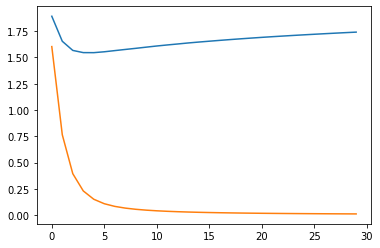

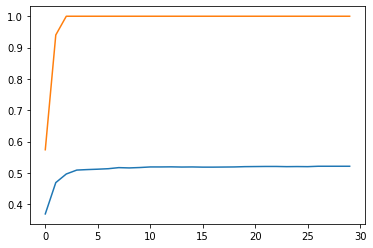

In [14]:
print(history1.history.keys())
plt.plot(np.arange(30), history1.history['val_loss'])
plt.plot(np.arange(30), history1.history['loss'])
plt.show()
plt.plot(np.arange(30), history1.history['val_accuracy'])
plt.plot(np.arange(30), history1.history['accuracy'])
plt.show()

In [15]:
model2 = Sequential()
model2.add(Dense(30, activation='sigmoid'))
model2.add(Dense(20, activation='sigmoid'))
model2.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
model2.compile(loss=loss,
              optimizer='sgd',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size=32, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2732 - accuracy: 0.1908 - val_loss: 2.2199 - val_accuracy: 0.3935
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1376 - accuracy: 0.4218 - val_loss: 2.0168 - val_accuracy: 0.5128
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8463 - accuracy: 0.5390 - val_loss: 1.6391 - val_accuracy: 0.5971
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4739 - accuracy: 0.6261 - val_loss: 1.2897 - val_accuracy: 0.6900
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1933 - accuracy: 0.6891 - val_loss: 1.0629 - val_accuracy: 0.7326
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0151 - accuracy: 0.7298 - val_loss: 0.9165 - val_accuracy: 0.7745
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8914 - accuracy: 0.7662 - val_loss: 0.8048 - val_accuracy:

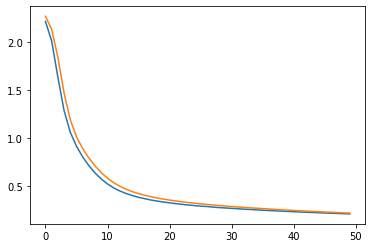

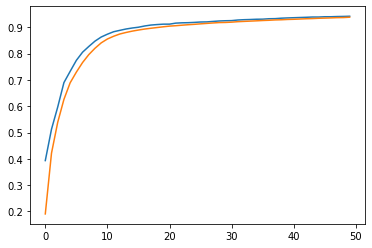

In [21]:
plt.plot(np.arange(50), history2.history['val_loss'])
plt.plot(np.arange(50), history2.history['loss'])
plt.show()
plt.plot(np.arange(50), history2.history['val_accuracy'])
plt.plot(np.arange(50), history2.history['accuracy'])
plt.show()

We can then test the model using the eval method.

In [22]:
loss, accuracy = model2.evaluate(x_test,y_test)
print("Loss: {}".format(loss))
print("Accuracy: {}".format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.9384
Loss: 0.2203548103570938
Accuracy: 0.9383999705314636


## Choosing the size of the optimization step

We have already tryied visualizing the training process. We will now see how to set the training step size we should use to start the training.

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6769 - accuracy: 0.8072 - val_loss: 0.2741 - val_accuracy: 0.9222
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9284 - val_loss: 0.1956 - val_accuracy: 0.9452
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1885 - accuracy: 0.9457 - val_loss: 0.1564 - val_accuracy: 0.9573
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1577 - accuracy: 0.9539 - val_loss: 0.1470 - val_accuracy: 0.9565
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1379 - accuracy: 0.9593 - val_loss: 0.1439 - val_accuracy: 0.9567
Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2588 - accuracy: 0.6499 - val_loss: 0.5418 - val_accuracy: 0.8643
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4384 - accuracy: 0.8873 - val_loss: 0.3321 - val_accuracy: 0.9076

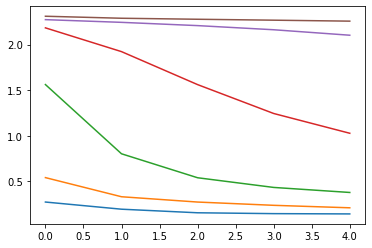

In [23]:
lr_list = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]


for lr in lr_list:
  model = Sequential()
  model.add(Dense(30, activation='sigmoid'))
  model.add(Dense(20, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))
  sgd = keras.optimizers.SGD(lr)
  loss = keras.losses.categorical_crossentropy
  model.compile(loss=loss,
                optimizer=sgd,
                metrics=['accuracy'])
  h = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=5)
  plt.plot(np.arange(5), h.history['val_loss'])
  
plt.show()

We can clearly see that at the beginning of the training setting a step size too small can make the training progress too slowly. However at the later stages of training this step can be too large for efficient optimization.

## Loading and saving a model

The following code shows how to load and save a model.

In [24]:
model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = keras.optimizers.SGD(0.3)
loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])
h = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=5)
model.save("model_5_epoch.h5")

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6885 - accuracy: 0.8005 - val_loss: 0.2904 - val_accuracy: 0.9202
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2547 - accuracy: 0.9266 - val_loss: 0.2034 - val_accuracy: 0.9417
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1964 - accuracy: 0.9423 - val_loss: 0.1703 - val_accuracy: 0.9520
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1632 - accuracy: 0.9511 - val_loss: 0.1581 - val_accuracy: 0.9533
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1426 - accuracy: 0.9572 - val_loss: 0.1412 - val_accuracy: 0.9578


In [25]:
from keras.models import load_model

model_loaded = load_model("model_5_epoch.h5")

h_l = model_loaded.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10, initial_epoch=5)

sgd = keras.optimizers.SGD(0.1)
loss = keras.losses.categorical_crossentropy
model_loaded.compile(loss=loss,
                     optimizer=sgd,
                     metrics=['accuracy'])
h_l = model_loaded.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=15, initial_epoch=10)

Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1262 - accuracy: 0.9625 - val_loss: 0.1344 - val_accuracy: 0.9621
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.9654 - val_loss: 0.1272 - val_accuracy: 0.9624
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9674 - val_loss: 0.1216 - val_accuracy: 0.9659
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0982 - accuracy: 0.9708 - val_loss: 0.1275 - val_accuracy: 0.9634
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.1216 - val_accuracy: 0.9666
Epoch 11/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0746 - accuracy: 0.9791 - val_loss: 0.1149 - val_accuracy: 0.9685
Epoch 12/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9799 - val_loss: 0.1178 - val_accura

## Callbacks

In the previous code example we performed some actions after every epoch (reducing the step size, model saving). Keras provides a convenient way of doing these things using callbacks. These can be added the the fit method call. Let us not see how they are used.

In [26]:
model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = keras.optimizers.SGD(0.3)
loss = keras.losses.categorical_crossentropy
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])


In [27]:
from keras.callbacks import *
callbacks = []

The ModelCheckpoint callback is very useful. In its constructor we can define the name of the file where to which we save the model. It is also possible set it up in a way in which only one model (e.g. with the highest validation accuracy) is saved.

In [28]:
callbacks.append(ModelCheckpoint('mnist_{epoch:02d}-{val_loss:.8f}-{val_accuracy:.4f}.h5', verbose=1, period=1))

Tensorboard callback allows us to use the tensorboard utility to monitor training.

In [29]:
callbacks.append(TensorBoard(log_dir='./logs'))

Early Stopping stops the training if some metric (validation accuracy, loss etc.) stops improving in some predermined amount of epochs.

In [30]:
callbacks.append(EarlyStopping(monitor='val_loss', patience=5, verbose=1))

Similarly, we can use a callback which automatically decreases the size of the training step if some metric has not improved in a few epochs.

In [31]:
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1))

We can use these callbacks for tranining.

In [32]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=callbacks, batch_size=32)

Epoch 1/30
   1/1563 [..............................] - ETA: 0s - loss: 2.5279 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1557/1563 [============================>.] - ETA: 0s - loss: 0.7135 - accuracy: 0.7884
Epoch 00001: saving model to mnist_01-0.29405439-0.9173.h5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7118 - accuracy: 0.7889 - val_loss: 0.2941 - val_accuracy: 0.9173
Epoch 2/30
1558/1563 [============================>.] - ETA: 0s - loss: 0.2596 - accuracy: 0.9253
Epoch 00002: saving model to mnist_02-0.20052858-0.9427.h5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2595 - accuracy: 0.9254 - val_loss: 0.2005 - val_accuracy: 0.9427
Epoch 3/30
1555/1563 [============================>.] - 

The result of this process can be a progressive decrease of the training step size during training. We can load the models in the same way we did a few cells above. The Tensorboard logs are also saved in a folder specified in the callback constructor. We can also plot the model architecture using the plot_model function.

We can also check the model architecture in the Tensorboard utility.

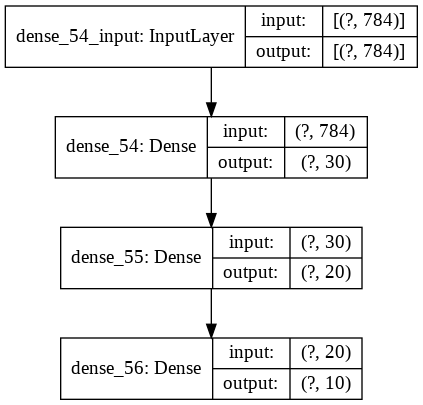

In [33]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
!kill 910

### Exercise 1

One of the callbacks we have not explored so far is the LearningRateScheduler callback. Check it out in the documentation and perform a training run with this callback in such a way that the training step sizes evolve in a fashion similar to using the ReduceLROnPlateau callback.

## Regularization

When discussing the data split we have shown that the model can sometimes overfit the data. This means that the model is improving the accuracy on the training data, but not improving or even worsening on the validation data. There are multiple approaches to combat this. We will now go over one way which is based on a slight modification of the loss function. The function will now have the form of:

$$ C_r = C + \lambda R,$$

where $C$ is the original loss function and $R$ is the regularization loss function. The difference between these two lies in the fact that the $R$ depends on the network parameters but not on the training data. $\lambda$ is a hyperparameter which determins the strength of the regularization term. The two most commonly used regularization terms are the L1 and L2 regularization.

$$ R_{L1} = \sum_{w \in W} |w|$$
$$ R_{L2} = \sum_{w \in W} w^2$$

where $W$ is the set of all parameters where the regularization is applied. We only apply this regularization on the weights of the network. We can evaluate the efficiency of the regularization in an extreme case where we only have a very small tranining set.

In [34]:
x_mini = np.repeat(x[:32], 1000, axis=0)
y_mini = np.repeat(y[:32], 1000, axis=0)

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

loss = keras.losses.categorical_crossentropy
sgd = keras.optimizers.SGD(0.3)
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])

h_r = model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)
[loss, acc] = model.evaluate(x_val, y_val)
print("Eval loss: {}, Eval acc: {}".format(loss, acc))

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3729 - accuracy: 0.9146
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3865 

In [36]:
from keras.regularizers import l1, l2

x_mini = np.repeat(x[:32], 1000, axis=0)
y_mini = np.repeat(y[:32], 1000, axis=0)

lmbda = 0.0001
model = Sequential()
model.add(Dense(30, activation='sigmoid', kernel_regularizer=l2(lmbda)))
model.add(Dense(20, activation='sigmoid', kernel_regularizer=l2(lmbda)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(lmbda)))

loss = keras.losses.categorical_crossentropy
sgd = keras.optimizers.SGD(0.3)
model.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])

h_r = model.fit(x_mini, y_mini, steps_per_epoch=1000, epochs=10)
[loss, acc] = model.evaluate(x_val, y_val)
print("Eval loss: {}, Eval acc: {}".format(loss, acc))

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4255 - accuracy: 0.9078
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0617 - accuracy: 1.0000
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0576 - accuracy: 1.0000
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0560 - accuracy: 1.0000
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0549 - accuracy: 1.0000
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0540 - accuracy: 1.0000
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0532 - accuracy: 1.0000
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0519 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 2.1084 

### Exercise 2

Find the most optimal value of $\lambda$ and the training step size. Compare the L1 and L2 regularization.